# Kmeans clustering

In [2]:
import pandas as pd
import scipy
import sklearn.cluster as skcl
import matplotlib.pyplot as plt
import sklearn.metrics as skmet

In [3]:
mcaPreproPoints = pd.read_csv("dataset/preprocessed-mca-shootings.csv")
mcaPreproCategories = pd.read_csv("dataset/preprocessed-mca-categories-shootings.csv")
famdPoints = pd.read_csv("dataset/preprocessed-famd-shootings.csv")

dataToUse = famdPoints
dataToUse

,0,1,2,3,4,5,6,7,8,9
0,1.409408,0.570111,-0.558744,-0.756580,-0.292834,0.365955,0.092134,-1.264439,0.251040,0.844229
1,0.949213,-0.314214,-0.097585,-0.461140,-0.350838,0.266920,-0.163641,-0.391941,-0.043697,0.386434
2,-1.258416,1.473916,0.215891,0.021696,0.616795,0.846983,-0.480348,1.210980,0.627515,1.076369
3,-0.074854,0.647348,-0.946673,0.162746,-1.151965,-0.351286,-0.112386,-1.181241,0.851208,0.009498
4,0.104122,0.090587,0.241266,-1.297269,-0.515937,0.498047,0.098525,0.664002,0.784879,-0.618767
...,...,...,...,...,...,...,...,...,...,...
4890,-1.072966,-0.336635,-0.549523,-0.374499,1.479234,-0.331654,1.244801,0.519065,1.101580,-0.258686
4891,-1.246684,-1.034545,-0.103138,0.437899,0.308519,0.247550,-0.050424,0.042855,-0.291085,-0.340441
4892,-0.847193,0.693018,0.190732,1.645872,-0.586147,0.156934,0.760710,0.386019,-1.025976,2.064429
4893,-1.066685,-0.174529,0.271797,0.312939,-0.288794,-0.450914,-0.751229,0.925073,-0.276100,1.003814


## Kmeans cluster number calculations

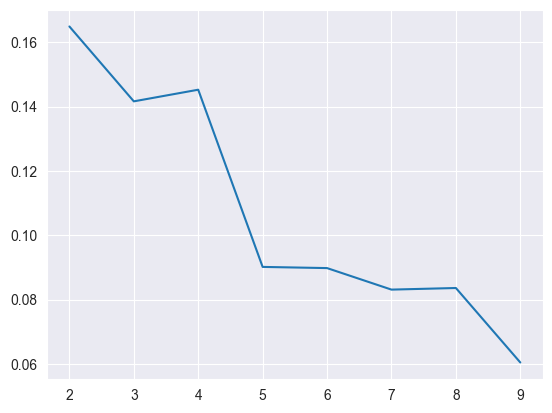

In [4]:
silhouetteList = []

for k in range(2, 10):
    kmeans = skcl.KMeans(
        init="random",
        n_init=10,
        n_clusters=k,
        algorithm="lloyd"
    ).fit(dataToUse[["0","1","2"]])

    score = skmet.silhouette_score(dataToUse, kmeans.labels_, metric="euclidean")
    silhouetteList.append(score)

plt.plot(range(2, 10), silhouetteList)
plt.show()

The most suited cluster number is 5 for this dataset

In [5]:
silhouetteList[3]

0.09016638383411998

## Plotting kmeans clusters

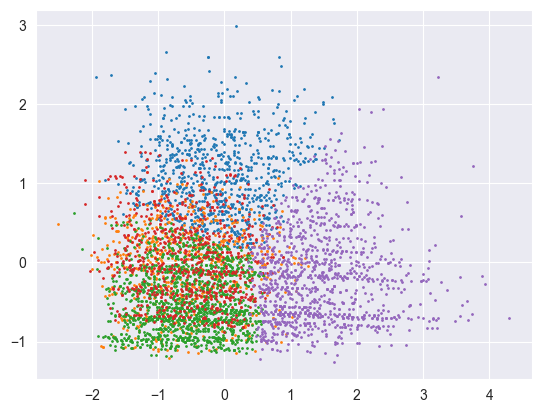

In [9]:
kmeans = skcl.KMeans(init="random", n_init=10, n_clusters=5).fit(famdPoints[["0", "1", "2", "3"]])
#display kmean result
#separate cluster data
clusters = [{"x":[], "y":[]} for i in range(5)]
for i in range(len(famdPoints)):
    clusters[kmeans.labels_[i]]["x"].append(famdPoints["0"].iloc[i])
    clusters[kmeans.labels_[i]]["y"].append(famdPoints["1"].iloc[i])
#plot data
for cluster in clusters:
    plt.scatter(cluster["x"], cluster["y"], s=1)

plt.show()

## Finding categories in clusters

In [7]:
kmeans.cluster_centers_

array([[-0.53908458, -0.48621075, -0.38846389,  0.12645446],
       [-0.07465903,  1.11169758, -0.26069756,  0.19713925],
       [ 1.45180441, -0.18659348, -0.00834503, -0.02161259],
       [-0.55525092,  0.06461073,  0.13931839, -0.87493095],
       [-0.56725299, -0.05111259,  1.15306823,  0.57334653]])

In [8]:
#assigning categories to each cluster
clusterCategories = [[] for _ in range(kmeans.n_clusters)]

for index, row in mcaPreproCategories.iterrows():
    minDist = scipy.spatial.distance.euclidean(kmeans.cluster_centers_[0], row[["0", "1", "2", "3"]])
    minClusterCenter = 0
    for i in range(1, kmeans.n_clusters):
        newDist = scipy.spatial.distance.euclidean(kmeans.cluster_centers_[i], row[["0", "1", "2", "3"]])
        if newDist < minDist:
            minClusterCenter = i
            minDist = newDist
    clusterCategories[minClusterCenter].append(row["category"])

clusterCategories

[['manner_of_death_shot',
  'age_26-35',
  'age_36-50',
  'age_51-75',
  'age_76+',
  'gender_M',
  'race_White',
  'region_East South Central',
  'region_New England',
  'region_West North Central',
  'region_West South Central',
  'signs_of_mental_illness_No',
  'threat_level_attack',
  'flee_Car',
  'body_camera_No',
  'arms_category_Guns'],
 ['race_Hispanic',
  'race_Native',
  'race_Other',
  'region_Mountain',
  'region_Pacific',
  'threat_level_other',
  'threat_level_undetermined',
  'flee_Other',
  'arms_category_Other weapon objects',
  'arms_category_Unknown'],
 ['manner_of_death_shot and Tasered',
  'race_Asian',
  'signs_of_mental_illness_Yes',
  'flee_Not fleeing',
  'arms_category_Blunt instruments',
  'arms_category_Other unusual objects',
  'arms_category_Sharp objects'],
 ['age_19-25',
  'gender_F',
  'race_Black',
  'region_East North Central',
  'region_Middle Atlantic',
  'region_South Atlantic',
  'arms_category_Unarmed',
  'arms_category_Vehicles'],
 ['age_0-18',

## Test all dimensions

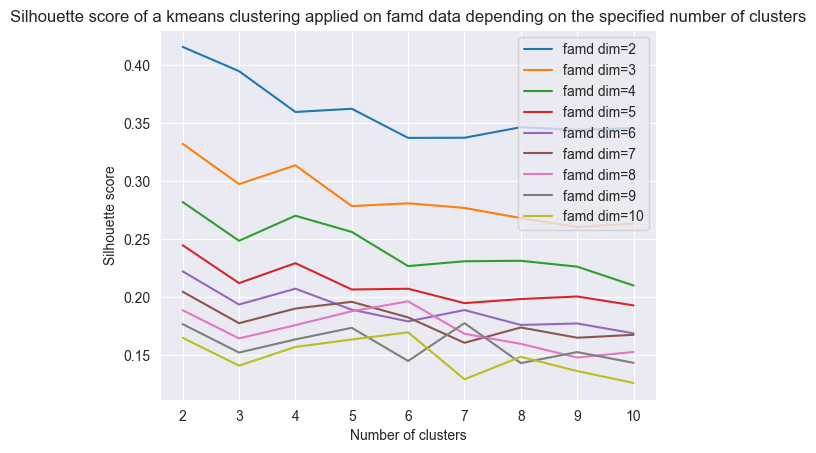

In [11]:
dimRange = 11
clusterRange = 11

for i in range(2, dimRange):
    data = pd.read_csv("dataset/famd-" + str(i) + "-shootings.csv")
    values = []
    for j in range(2, clusterRange):
        kmeans = skcl.KMeans(init="random", n_init=10, n_clusters=j).fit(data)
        s = skmet.silhouette_score(data, kmeans.labels_, metric="euclidean")
        values.append(s)

    plt.plot([i for i in range(2, clusterRange)], values, label = "famd dim=" + str(i))

plt.title("Silhouette score of a kmeans clustering applied on famd data depending on the specified number of clusters")
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.legend()
plt.show()

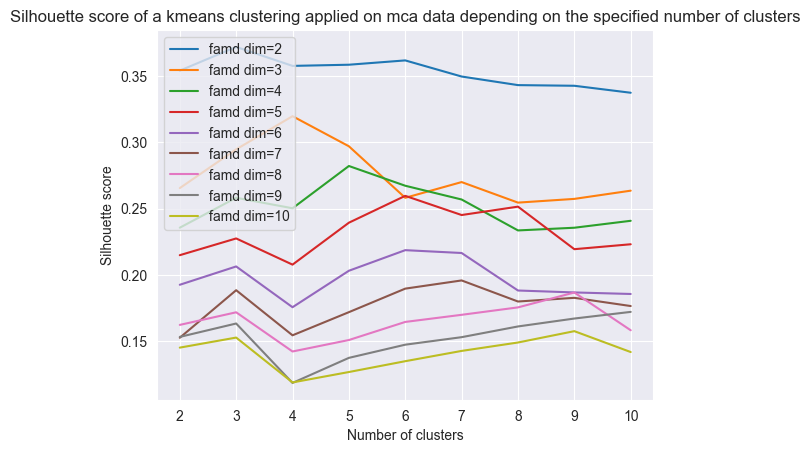

In [12]:
dimRange = 11
clusterRange = 11

for i in range(2, dimRange):
    data = pd.read_csv("dataset/mca-" + str(i) + "-shootings.csv")
    values = []
    for j in range(2, clusterRange):
        kmeans = skcl.KMeans(init="random", n_init=10, n_clusters=j).fit(data)
        s = skmet.silhouette_score(data, kmeans.labels_, metric="euclidean")
        values.append(s)

    plt.plot([i for i in range(2, clusterRange)], values, label = "famd dim=" + str(i))

plt.title("Silhouette score of a kmeans clustering applied on mca data depending on the specified number of clusters")
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.legend()
plt.show()